In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Merged_GNSS_and_SNR_HKOH.csv'
gnss_data = pd.read_csv(file_path)

# Convert 'TIME' column to datetime and specify dayfirst=True to handle the format
gnss_data['TIME'] = pd.to_datetime(gnss_data['TIME'], dayfirst=True)
gnss_data['Time_seconds'] = (gnss_data['TIME'] - gnss_data['TIME'].min()).dt.total_seconds()

# Define features (including time) and target variable
features = ['Time_seconds', 'Phase (m)', 'STD of Pseudorange L1 (m)', 'STD of Pseudorange L2 (m)',
            'Elevation', 'Azimuth', 'SNR(dBHz)', 'L1 MP(m)']
target = 'Pseudorange Residual (m)'

# Drop rows with missing values
gnss_data_clean = gnss_data.dropna(subset=features + [target])

# Split data into features (X) and target (y)
X = gnss_data_clean[features]
y = gnss_data_clean[target]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets, maintaining time-based order
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Random Forest

RMS of Original Pseudorange Residual (M_original): 0.7489 meters
RMS after model prediction (M_m): 0.4851 meters
Improvement Rate: 35.22%


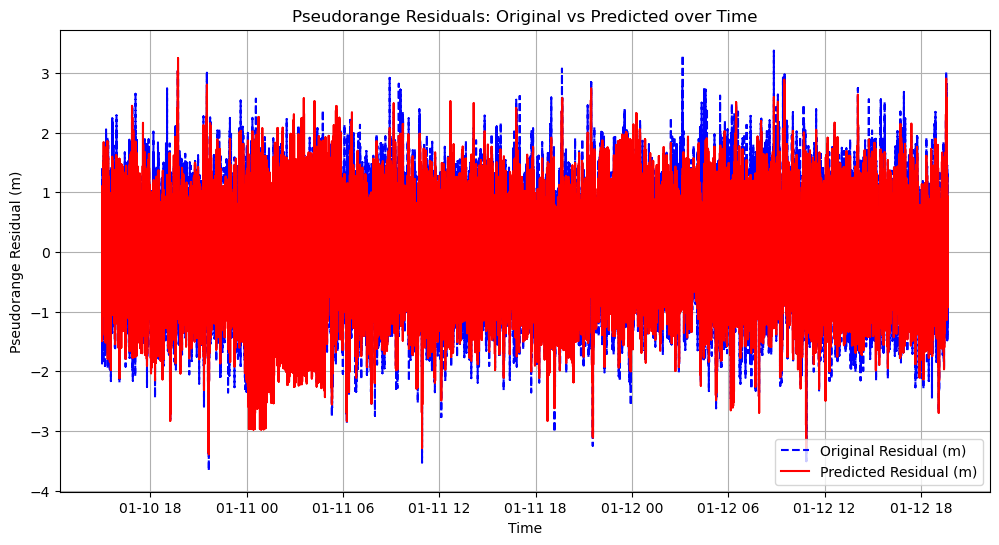

In [2]:
# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict the pseudorange residuals
y_pred = rf_model.predict(X_test)

# Calculate RMS for the original and model-predicted residuals
a1 = np.sqrt(mean_squared_error(y_test, np.zeros_like(y_test)))  # RMS of original data
a2 = np.sqrt(mean_squared_error(y_test, y_pred))  # RMS after model prediction

# Calculate improvement rate
improvement_rate = (a1 - a2) / a1

# Print the results
print(f'RMS of Original Pseudorange Residual (M_original): {a1:.4f} meters')
print(f'RMS after model prediction (M_m): {a2:.4f} meters')
print(f'Improvement Rate: {improvement_rate * 100:.2f}%')

# Plot the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred):], y_pred, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()

# FCNN

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 240us/step - loss: 0.1851
Epoch 2/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 229us/step - loss: 0.1705
Epoch 3/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 245us/step - loss: 0.1684
Epoch 4/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 232us/step - loss: 0.1674
Epoch 5/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 229us/step - loss: 0.1640
Epoch 6/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 241us/step - loss: 0.1653
Epoch 7/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 244us/step - loss: 0.1639
Epoch 8/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 239us/step - loss: 0.1640
Epoch 9/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 249us/step - loss: 0.1617
Epoch 10/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 244us/step - loss: 0.1612
Epoch 11/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 248us/step - loss: 0.1606
Epoch 12/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 242us/step - loss: 0.1589
Epoch 13/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 246us/step - loss: 0.1594
Epoch 14/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 243us/step - loss: 0.1580
Epoch 15/50


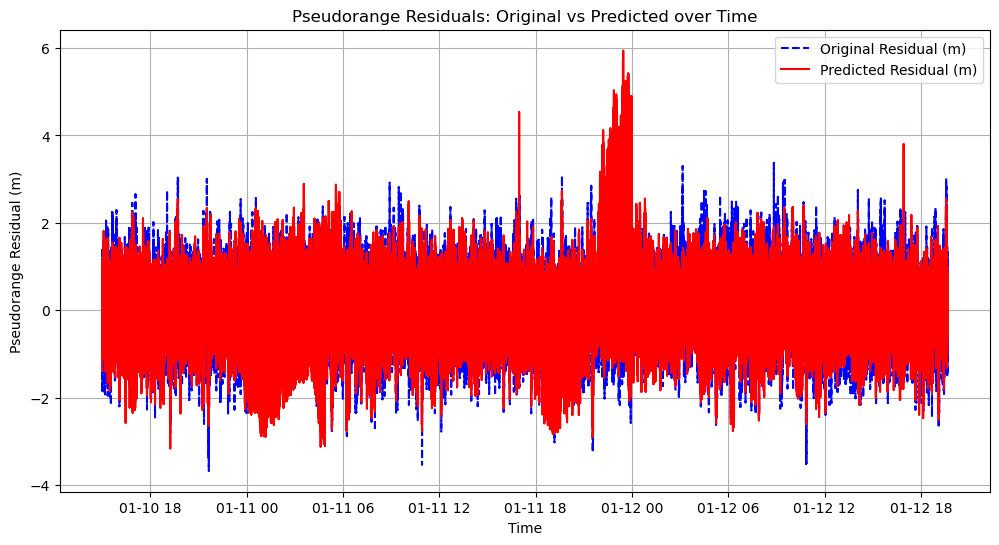

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the FCNN model
fcnn_model = Sequential()
fcnn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
fcnn_model.add(Dense(32, activation='relu'))
fcnn_model.add(Dense(1))

# Compile the model
fcnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
fcnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_fcnn = fcnn_model.predict(X_test)

# Calculate RMS for FCNN
a2_fcnn = np.sqrt(mean_squared_error(y_test, y_pred_fcnn))
improvement_rate_fcnn = (a1 - a2_fcnn) / a1

print(f'RMS of FCNN: {a2_fcnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_fcnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_fcnn):], y_pred_fcnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# CNN

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7256/7256 ━━━━━━━━━━━━━━━━━━━━ 3s 324us/step - loss: 0.1843
Epoch 2/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 308us/step - loss: 0.1719
Epoch 3/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 305us/step - loss: 0.1682
Epoch 4/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 315us/step - loss: 0.1664
Epoch 5/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 309us/step - loss: 0.1648
Epoch 6/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 299us/step - loss: 0.1625
Epoch 7/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 304us/step - loss: 0.1629
Epoch 8/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 299us/step - loss: 0.1613
Epoch 9/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 307us/step - loss: 0.1595
Epoch 10/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 308us/step - loss: 0.1584
Epoch 11/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 305us/step - loss: 0.1591
Epoch 12/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 298us/step - loss: 0.1589
Epoch 13/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 308us/step - loss: 0.1576
Epoch 14/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 2s 301us/step - loss: 0.1561
Epoch 15/50


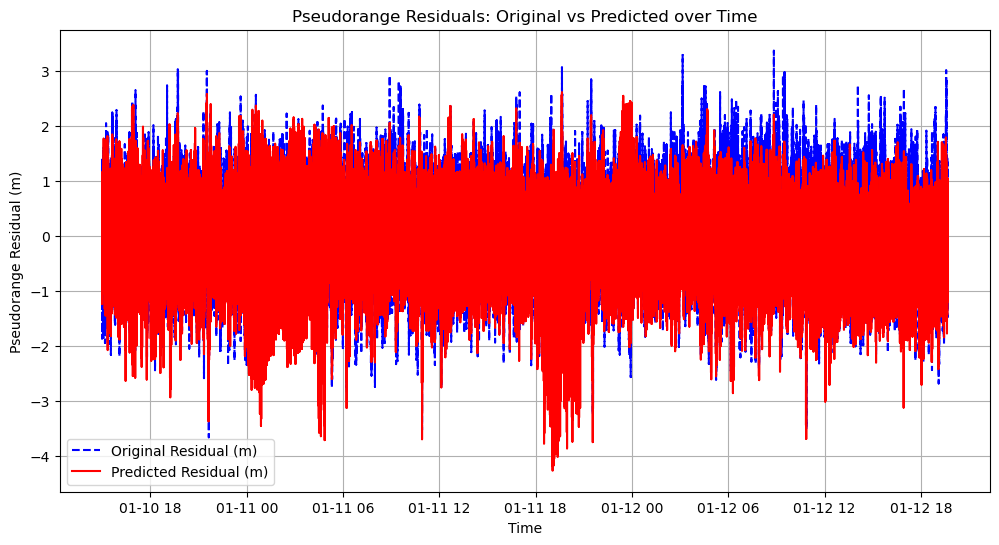

In [4]:
from keras.models import Sequential
from keras.layers import Conv1D, Flatten, Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reshape the input data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_cnn = cnn_model.predict(X_test_cnn)

# Calculate RMS for CNN
a2_cnn = np.sqrt(mean_squared_error(y_test, y_pred_cnn))
improvement_rate_cnn = (a1 - a2_cnn) / a1

print(f'RMS of CNN: {a2_cnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_cnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_cnn):], y_pred_cnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# RNN/LSTM

Epoch 1/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7256/7256 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.1973
Epoch 2/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1738
Epoch 3/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1722
Epoch 4/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1693
Epoch 5/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1679
Epoch 6/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.1664
Epoch 7/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.1642
Epoch 8/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.1613
Epoch 9/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1610
Epoch 10/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.1583
Epoch 11/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.1572
Epoch 12/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.1555
Epoch 13/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.1532
Epoch 14/50
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1517
Epoch 15/50
7256/7256 ━━━━

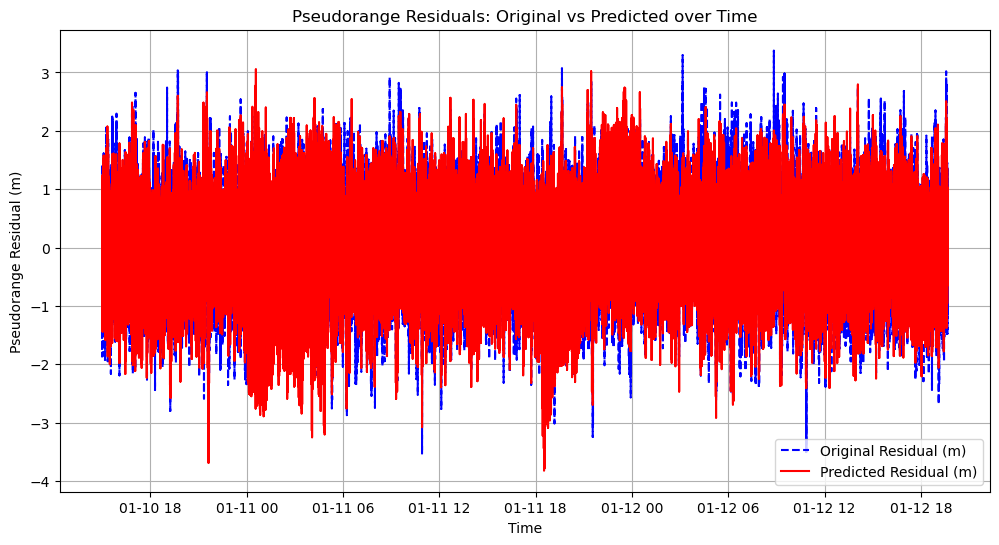

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Reshape the input data for LSTM
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

# Define the LSTM model
rnn_model = Sequential()
rnn_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(LSTM(50))
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)

# Predicting
y_pred_rnn = rnn_model.predict(X_test_rnn)

# Calculate RMS for LSTM
a2_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
improvement_rate_rnn = (a1 - a2_rnn) / a1

print(f'RMS of LSTM: {a2_rnn:.4f} meters')
print(f'Improvement Rate: {improvement_rate_rnn * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_rnn):], y_pred_rnn, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Decision Tree Regressor

RMS of Decision Tree: 0.7047 meters
Improvement Rate: 5.91%


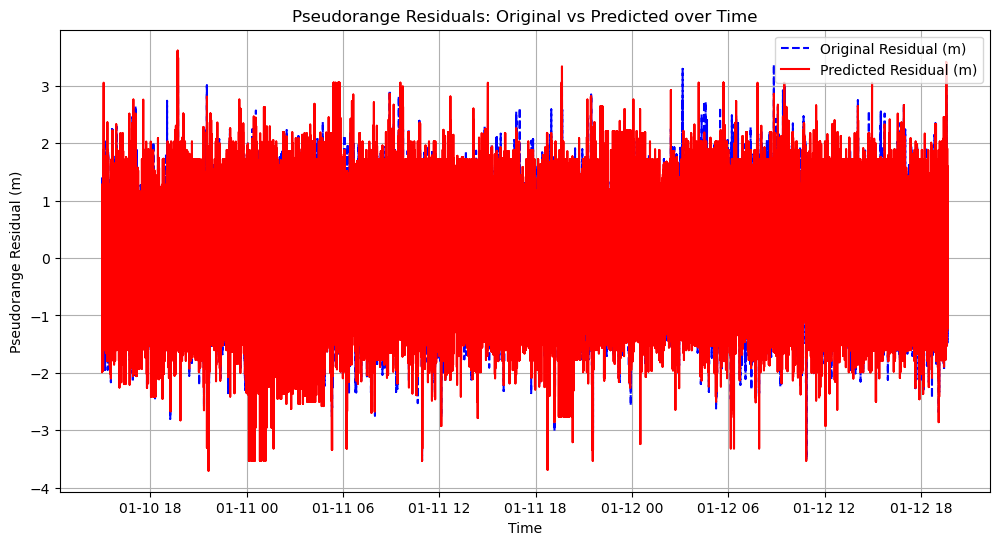

In [6]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting
y_pred_dt = dt_model.predict(X_test)

# Calculate RMS for Decision Tree
a2_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
improvement_rate_dt = (a1 - a2_dt) / a1

print(f'RMS of Decision Tree: {a2_dt:.4f} meters')
print(f'Improvement Rate: {improvement_rate_dt * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_dt):], y_pred_dt, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Linear Regression

RMS of Linear Model: 0.6051 meters
Improvement Rate: 19.20%


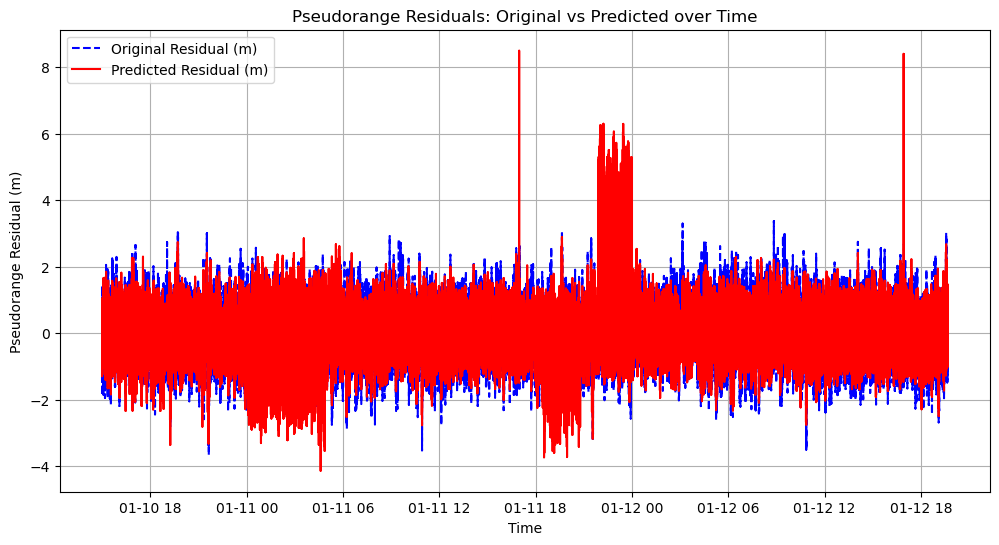

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicting
y_pred_linear = linear_model.predict(X_test)

# Calculate RMS for Linear Model
a2_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
improvement_rate_linear = (a1 - a2_linear) / a1

print(f'RMS of Linear Model: {a2_linear:.4f} meters')
print(f'Improvement Rate: {improvement_rate_linear * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_linear):], y_pred_linear, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


# Support Vector Regression (SVR)

RMS of RBF SVR Model (Downsampled): 0.5013 meters
Improvement Rate: 33.07%


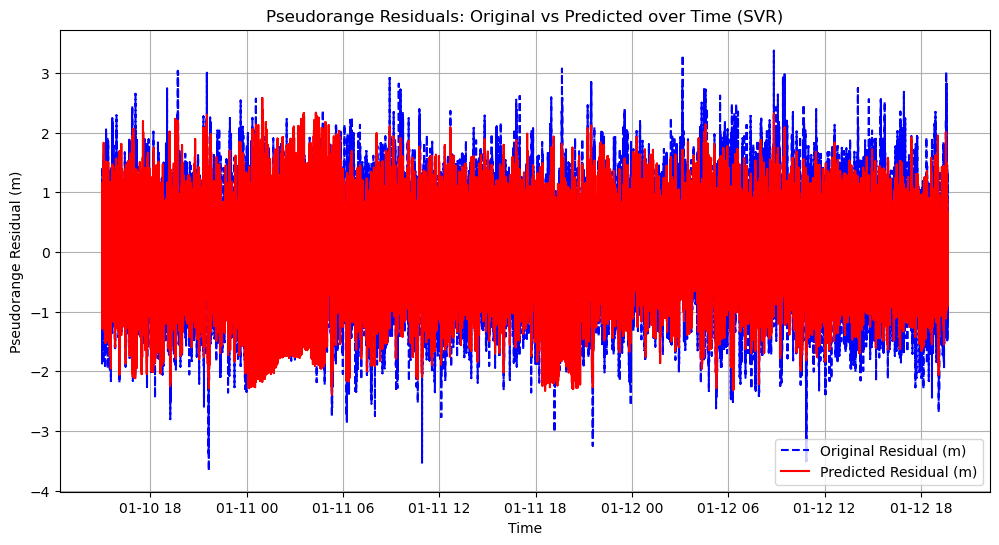

In [8]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt

# Downsample the data (e.g., to 50% of the original data)
X_train_downsampled, y_train_downsampled = resample(X_train, y_train, n_samples=int(len(X_train) * 0.5), random_state=42)

# Scaling the downsampled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_downsampled)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model with 'rbf' kernel
svm_model_rbf = SVR(kernel='rbf', cache_size=200, tol=1e-3)
svm_model_rbf.fit(X_train_scaled, y_train_downsampled)

# Predicting
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)

# Calculate RMS for SVR with RBF kernel
a2_svm_rbf = np.sqrt(mean_squared_error(y_test, y_pred_svm_rbf))
improvement_rate_svm_rbf = (a1 - a2_svm_rbf) / a1

print(f'RMS of RBF SVR Model (Downsampled): {a2_svm_rbf:.4f} meters')
print(f'Improvement Rate: {improvement_rate_svm_rbf * 100:.2f}%')

# Plotting the comparison between original and predicted residuals over time
plt.figure(figsize=(12, 6))
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_test):], y_test, label='Original Residual (m)', color='blue', linestyle='--')
plt.plot(gnss_data_clean['TIME'].iloc[-len(y_pred_svm_rbf):], y_pred_svm_rbf, label='Predicted Residual (m)', color='red')
plt.title('Pseudorange Residuals: Original vs Predicted over Time (SVR)')
plt.xlabel('Time')
plt.ylabel('Pseudorange Residual (m)')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to create the CNN model (for KerasRegressor)
def create_cnn(filters=64, kernel_size=2, activation='relu'):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(X_train_cnn.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Reshape the input data for CNN
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Wrap the model using KerasRegressor from scikeras, passing the default values for filters and kernel_size
cnn_model = KerasRegressor(model=create_cnn, verbose=1)

# Define the parameter grid for tuning
param_grid = {
    'model__filters': [32, 64, 128],  # Pass filters as model__filters
    'model__kernel_size': [2, 3, 4],  # Pass kernel_size as model__kernel_size
    'epochs': [10, 20, 50],           # epochs stays the same
    'batch_size': [32, 64],           # batch_size stays the same
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=cnn_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_cnn, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict
best_cnn_model = grid_search.best_estimator_
y_pred_cnn_tuned = best_cnn_model.predict(X_test_cnn)

# Calculate RMS for the tuned CNN model
a2_cnn_tuned = np.sqrt(mean_squared_error(y_test, y_pred_cnn_tuned))
improvement_rate_cnn_tuned = (a1 - a2_cnn_tuned) / a1

print(f'RMS of Tuned CNN: {a2_cnn_tuned:.4f} meters')
print(f'Improvement Rate: {improvement_rate_cnn_tuned * 100:.2f}%')


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/10
Epoch 1/10
Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model i

Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 983us/step - loss: 0.1914
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1906
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1958
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19317
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19470
Epoch 2/10
4588/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1983Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.193378
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19740
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19110
1396/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1735Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1909
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19320
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1892
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2279/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - loss: 0.160
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 970us/step - loss: 0.1654
1684/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 726us/step - loss: 0.1624

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1870/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 708us/step - loss: 0.1623[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.1min
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - loss: 0.161
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 831us/step - loss: 0.1619
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 738us/step - loss: 0.1585
2910/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: 0.1618[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/10
1315/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.161

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3272/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step - loss: 0.1617[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.1min
Epoch 1/10
2068/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - loss: 0.161

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 677us/step - loss: 0.1617
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1000us/step- loss: 0.211
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - loss: 0.20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 742us/step - loss: 0.1616
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 898us/step - loss: 0.239
1229/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 624us/step - loss: 0.2073

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1430/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 608us/step - loss: 0.2043[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.1min
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.196

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - loss: 0.20
1855/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - loss: 0.1999[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/10
1982/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 0.1990[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.1min
Epoch 1/10
2634/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 0.1954

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2707/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - loss: 0.1951[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.1min
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 761us/step - loss: 0.1908
Epoch 2/10
 179/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 849us/step - loss: 0.3128s: 0.1924

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3205/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - loss: 0.1932[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.1min
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - loss: 0.198
3392/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - loss: 0.1926[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=4; total time= 1.1min
Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 785us/step - loss: 0.1904
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 788us/step - loss: 0.1869
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 744us/step - loss: 0.1892
Epoch 2/10
 510/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22985

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2942/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - loss: 0.1969[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=2; total time= 1.2min
Epoch 1/10
 689/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.22067

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 909/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1742[CV] END batch_size=32, epochs=10, model__filters=32, model__kernel_size=3; total time= 1.2min
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 972us/step - loss: 0.1745
3355/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1919Epoch 3/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1907 
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.18835
2858/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1930Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.17313
Epoch 3/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.17443
Epoch 3/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1889
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1737
Epoch 3/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1882
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1875
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1928
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 929/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.0min
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.16129
Epoch 9/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1610
Epoch 9/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.159
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.161897
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16149
Epoch 9/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16479
Epoch 9/10
 844/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2113 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1385/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1594[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.1min
Epoch 1/10
3601/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step - loss: 0.1593

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3672/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - loss: 0.1593[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=3; total time= 1.1min
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 988us/step - loss: 0.1598
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - loss: 0.159
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 914us/step - loss: 0.1593
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16433
Epoch 9/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1646
Epoch 9/10
2910/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1647[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.1min
Epoch 1/20
3246/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1597

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step loss: 0.2058
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1615
Epoch 10/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1607
Epoch 10/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 945us/step loss: 0.161
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1879
Epoch 2/10
 557/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1623

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 296/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1637[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.2min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1601
Epoch 10/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1642
Epoch 10/10
 400/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16399

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2822/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1633[CV] END batch_size=32, epochs=10, model__filters=64, model__kernel_size=4; total time= 1.1min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1881 
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16236
4599/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1871Epoch 10/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.18671
3314/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1608Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16305
Epoch 10/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19179
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.15971
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.16101
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1728 
 240/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  Epoch 3/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.16370
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 999us/step - loss: 0.1905
Epoch 2/20
4837/4837

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1324/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1673[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.2min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.17431
Epoch 3/20
1591/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 962us/step - loss: 0.1674[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.3min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1607 6
2852/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.17501

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1977/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 0.1674[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.2min
Epoch 1/20
 542/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 931us/step - loss: 0.1699[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.3min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 947us/step - loss: 0.1714
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.17071
Epoch 4/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 992us/step - loss: 0.1744
Epoch 3/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.171
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16791 
Epoch 4/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 912us/step - loss: 0.1716
Epoch 4/20
 676/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1690

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.17139
Epoch 4/10
2758/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 922us/step - loss: 0.1998[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=3; total time= 1.3min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 988us/step - loss: 0.1954
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.17120
Epoch 4/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1949
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17198
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 972us/step - loss: 0.1908
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 998us/step - loss: 0.1978
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17141
Epoch 4/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16830
Epoch 5/10
4665/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.1701

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2330/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1672[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=2; total time= 1.4min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 941us/step - loss: 0.1700
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16719
Epoch 5/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.16902
Epoch 5/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.17582
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16690
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1722
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.194108
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1739 
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17234
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16921
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16865
Epoch 6/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1644
Epoch 6

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3259/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1590[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.2min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16430
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15931
Epoch 13/20
3728/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1589[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.2min
Epoch 1/20
2383/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1585 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1646 
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1609
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15878
Epoch 13/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.1634
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.159018
Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1614  
Epoch 12/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 974us/step - loss: 0.1642
Epoch 9/20
2970/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1661[CV] END batch_size=32, epochs=10, model__filters=128, model__kernel_size=4; total time= 1.2min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16112
Epoch 12/20
2775/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.15918

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.161579
Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15908
Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15908
Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1652
Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15841
Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.18959
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1894
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1596
4224/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1590Epoch 13/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1624
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1590
2016/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1955Epoch 12/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15995
Epoch 13/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1605 
2928/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1622 
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1623
Epoch 9/20
2332/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1550[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 1.8min
Epoch 1/20
1630/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1565

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1570
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1625
Epoch 9/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1543
Epoch 20/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1549
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1663
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1574
Epoch 19/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1599
Epoch 19/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15644
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1517 
3308/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.15328

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3113/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1953[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.1min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1625
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1899
Epoch 2/20
3915/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.16138

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2296/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1580[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=2; total time= 2.1min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1533
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1898
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1614
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1627
Epoch 9/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1550
Epoch 20/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1585
Epoch 20/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15776
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1581
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1641
4536/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1756

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4684/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1756[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.0min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1755
2911/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1613Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1606
Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1958
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1613
Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1722
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1538
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1909
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1587
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1617 
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1575
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.179
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.165
2419/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.161
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1709
Epoch 4/20
 611/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1598

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 503/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1711[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.1min
Epoch 1/20
4319/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1615[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=4; total time= 2.0min
Epoch 1/20
 908/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1705

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1747
4678/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1745Epoch 3/20
  31/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1636   0.1607

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__filters=32, model__kernel_size=3; total time= 2.2min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1680
Epoch 4/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1745
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1614
Epoch 12/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.19073
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16082
Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16961
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15980
Epoch 13/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.18802
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17212
Epoch 4/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1594 
Epoch 13/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1735
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1667
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.19

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2929/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1574[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=2; total time= 2.2min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1599
Epoch 13/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 995us/step loss: 0.1513
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15576
Epoch 20/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15757
Epoch 12/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15917
Epoch 13/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15877
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1578 
Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.162842
Epoch 9/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1598 
Epoch 14/20
1432/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.20551

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1272/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1567[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=2; total time= 2.3min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1615
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1580
Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1617
 303/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 716us/step - loss: 0.2452Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1553
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1576
Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1562
Epoch 13/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1898
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15846
3253/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1608Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15787
Epoch 15/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.16247
3234/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1582
Epoch 15/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1610
Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1584
Epoch 15/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1571
Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1573
Epoch 12/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1743
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1560
Epoch 16/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1590
Epoch 11/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1583
Epoch 16/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1586
Epoch 12/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.17246
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1581
Epoch 16/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1578 
Epoch 16/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1611
Epoch 12/20
4837/4837 ━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=3; total time= 2.2min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1572
Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - loss: 0.15 
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1553
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15554
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16514
Epoch 8/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15314
Epoch 20/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15694
Epoch 17/20
1483/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.155865

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1669/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1559[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=3; total time= 2.2min
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 914us/step - loss: 0.1546
Epoch 18/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15524
1838/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - loss: 0.1546Epoch 16/20
3133/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1618[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.1min
Epoch 1/20
   1/4837 ━━━━━━━━━━━━━━━━━━━━ 5:13 65ms/step - loss: 0.29120.15154

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15754
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1636
Epoch 7/20
2620/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1992

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1067/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2154[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=3; total time= 2.2min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1618
Epoch 8/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1563
1211/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2150Epoch 17/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1531
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1647
Epoch 9/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1545 
Epoch 19/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1559
Epoch 18/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1913
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1575
Epoch 17/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1901
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1912
Epoch 2/20
 943/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 918/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1708[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.2min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1632
Epoch 8/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1891
Epoch 2/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1586
Epoch 9/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.15707
Epoch 18/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15416
Epoch 20/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.16256
Epoch 10/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1553
Epoch 19/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1741 
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1567 
Epoch 18/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1710
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1734 
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 992us/step - loss: 0.1749
Epoch 3

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__filters=64, model__kernel_size=4; total time= 2.3min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16737
Epoch 5/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16710
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 993us/step - loss: 0.1677
Epoch 4/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16701
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15629
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step   - loss: 0.170
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15868
Epoch 11/20
2040/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step - loss: 0.2066

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4563/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1593[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=2; total time= 2.4min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15933
Epoch 12/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 938us/step - loss: 0.1684
Epoch 6/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15528
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16697
Epoch 6/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16036
Epoch 13/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 941us/step - loss: 0.1683
Epoch 5/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19211
Epoch 2/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.153
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1657
Epoch 6/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1548
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1587
Epoch 12/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1653
Epoch 7/50
3424/4837 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3605/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1629[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=2; total time= 2.5min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.15725
Epoch 13/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19425
Epoch 2/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.164551
Epoch 6/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1632
Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1695 
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.16526
Epoch 7/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1594 
Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17326
Epoch 3/50
1797/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.15760

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3547/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1650[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=2; total time= 2.5min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.16562
Epoch 7/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16492
Epoch 8/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 972us/step - loss: 0.1623
Epoch 7/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1749
Epoch 3/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1581
Epoch 13/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1717
Epoch 4/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19398
Epoch 2/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.15748
 135/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - loss: 0.1808Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1626 
4042/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1576Epoch 7/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1625
Epoch 8/20
4837/4837 ━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2913/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1584[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=3; total time= 2.5min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16114
Epoch 11/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15636
Epoch 15/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.15327
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.15687
Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 949us/step - loss: 0.1589
Epoch 13/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15924
Epoch 10/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 979us/step - loss: 0.1543
Epoch 17/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15228
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 990us/step - loss: 0.1579
Epoch 18/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1590
Epoch 14/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.154
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15468
Epoch 16/20
4837/4837 ━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15635
4172/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1533Epoch 16/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.19216
Epoch 2/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1594
Epoch 11/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15876
Epoch 14/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 165/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1561[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=3; total time= 2.4min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1536
Epoch 15/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15436
Epoch 18/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1564
Epoch 19/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1595
Epoch 15/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1593
Epoch 13/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1544
Epoch 17/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1590
Epoch 12/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1744
Epoch 3/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1545
Epoch 19/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1576
Epoch 15/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1553
Epoch 17/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1562
Epoch 20

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 898/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 959us/step - loss: 0.1567[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=4; total time= 2.3min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16534
Epoch 6/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 949us/step - loss: 0.1548
Epoch 19/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 906us/step - loss: 0.1650
Epoch 8/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 951us/step - loss: 0.1517
Epoch 25/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15666
Epoch 18/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 929us/step - loss: 0.1531
Epoch 26/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 965us/step - loss: 0.1562
Epoch 22/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1626
Epoch 8/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15284
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1532  
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 985us/step - loss: 0.1649
Epoch 7/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1532 
Epoch 20/50
4837

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 972us/step - loss: 0.1540
Epoch 27/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 982us/step - loss: 0.1553
Epoch 23/50
[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=4; total time= 2.4min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1633
Epoch 8/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15524
Epoch 21/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1682 
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1647 
Epoch 10/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15432
Epoch 22/50
4482/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.15142

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17613
Epoch 3/50
4787/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1514[CV] END batch_size=32, epochs=20, model__filters=128, model__kernel_size=4; total time= 2.5min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15143
Epoch 27/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15601
Epoch 20/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16164
Epoch 10/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15548
Epoch 24/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15504
Epoch 28/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16284
Epoch 9/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15275
Epoch 22/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 966us/step - loss: 0.1635
Epoch 11/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.18964
Epoch 2/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1546 
Epoch 23/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 975us/step - loss: 0.15

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 903/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1493[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=2; total time= 4.4min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.144
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1475
Epoch 43/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1505
Epoch 34/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15455
Epoch 25/50
2649/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1542[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=2; total time= 4.3min
Epoch 1/50
3662/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.15377

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15368
Epoch 34/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15428
Epoch 32/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15053
4315/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1541Epoch 45/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14853
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1541
Epoch 49/50
Epoch 21/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14963
Epoch 45/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15403
Epoch 23/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14867
Epoch 44/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 993us/step - loss: 0.1489
Epoch 35/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15448
Epoch 26/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1877
2819/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1486Epoch 2/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 995us/step - loss: 0.1539
Epoch 35/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 8

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3491/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1717[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=2; total time= 4.3min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15042
Epoch 48/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1520 
Epoch 35/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1542
Epoch 25/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.17091
Epoch 4/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14917
3244/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 0.1495Epoch 38/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15357
Epoch 24/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 982us/step - loss: 0.1473
 668/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 889us/step - loss: 0.2359Epoch 47/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 888us/step - loss: 0.1495
Epoch 49/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15198
Epoch 29/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16816
Epoch 5/50
4837/4837

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15130 
Epoch 27/50
2690/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.16247

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 979us/step - loss: 0.1646
Epoch 8/50
4029/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.1520[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=3; total time= 4.5min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15157
Epoch 41/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 987us/step - loss: 0.1521
Epoch 39/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15226
Epoch 32/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16307
Epoch 7/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 956us/step - loss: 0.1470
Epoch 50/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15252
Epoch 29/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1471 
Epoch 42/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1701 
Epoch 5/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15101
Epoch 28/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1614 
4278/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1916Epoch 9/5

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1597/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1540  [CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=3; total time= 4.7min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.160287
Epoch 9/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 997us/step - loss: 0.1674
Epoch 7/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15140
Epoch 31/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15973
Epoch 11/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 965us/step - loss: 0.1699
Epoch 4/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 995us/step - loss: 0.1495
Epoch 30/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15257 
Epoch 42/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 990us/step - loss: 0.1473
Epoch 45/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 998us/step - loss: 0.1693
Epoch 4/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15271
Epoch 35/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16471
Epoch 8/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 985us/step - loss: 0.1506 
Epoch 49/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 971us/step - loss: 0.1578
Epoch 18/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 850us/step - loss: 0.1658
Epoch 8/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 789us/step - loss: 0.1569
Epoch 16/50
 129/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1542[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=4; total time= 4.2min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 791us/step - loss: 0.1580
Epoch 11/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 790us/step - loss: 0.1584
Epoch 14/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 934us/step - loss: 0.1480
Epoch 37/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 881us/step - loss: 0.1500
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 882us/step - loss: 0.1609
1907/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - loss: 0.1550Epoch 11/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 841us/step - loss: 0.1641
Epoch 9/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 874us/step - loss: 0.1498
Epoch 50/50

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15590
Epoch 12/50
2987/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1654[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=4; total time= 4.5min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14830
Epoch 38/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.19138
Epoch 2/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 958us/step - loss: 0.1618
Epoch 12/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 935us/step - loss: 0.1504
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16459
Epoch 10/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15549
Epoch 20/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15399
Epoch 18/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.150390
Epoch 39/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.20159
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 833us/step - loss: 0.1552
Epoch 13/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 959us/step - loss: 0.1587
Epoch 16/50
4837/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3119/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1508[CV] END batch_size=32, epochs=50, model__filters=32, model__kernel_size=4; total time= 4.4min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 979us/step - loss: 0.1628
Epoch 11/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 956us/step - loss: 0.1548
Epoch 21/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1752  
Epoch 3/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15369
Epoch 19/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1506 
Epoch 40/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.18750
Epoch 2/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 971us/step - loss: 0.1576
Epoch 17/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15604
Epoch 14/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 994us/step - loss: 0.1502
Epoch 42/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 945us/step - loss: 0.1596
Epoch 14/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14743
Epoch 40/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 970us/step - loss:

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2386/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - loss: 0.1535[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=2; total time= 4.8min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16093
Epoch 10/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.150939
Epoch 32/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15382
Epoch 25/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.16160
Epoch 12/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15380
Epoch 22/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 980us/step - loss: 0.1528
Epoch 23/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.150802
Epoch 30/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14562
Epoch 50/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 992us/step - loss: 0.1527
2825/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 0.1504Epoch 27/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1599 
Epoch 11/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14862
483

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1486/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1731[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=2; total time= 4.8min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15878
Epoch 12/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 993us/step - loss: 0.1487
Epoch 34/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1424
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1523
Epoch 27/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1493
Epoch 25/50
 891/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2183

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1532
Epoch 24/50
1015/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2146[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=2; total time= 4.8min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1498
Epoch 32/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1736
Epoch 3/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1612
Epoch 14/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1522
Epoch 29/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1516
Epoch 35/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1526
Epoch 28/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.15951
2543/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1512Epoch 13/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.1601
Epoch 12/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1497
Epoch 26/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1892
Epoch 2/50
4837/4837

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 955/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1536[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=3; total time= 4.5min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.15401
Epoch 27/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.15453
Epoch 26/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15651
Epoch 16/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14409
Epoch 49/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 998us/step - loss: 0.1497
Epoch 45/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14485
Epoch 43/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15475
Epoch 16/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14905
Epoch 42/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15651
Epoch 18/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1522
Epoch 27/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15378
Epoch 27/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.188

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1352/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 931us/step - loss: 0.1459[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=3; total time= 4.7min
Epoch 1/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1523
Epoch 29/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15476
Epoch 18/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15576
Epoch 20/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15226
Epoch 29/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1687
Epoch 4/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.153553
Epoch 29/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1485 
Epoch 48/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1568
Epoch 19/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 928us/step - loss: 0.1464
Epoch 48/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14588
Epoch 46/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14721
Epoch 45/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3006/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1543[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=4; total time= 4.5min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.150
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15383
4402/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.1467Epoch 22/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15371 
Epoch 22/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 929us/step - loss: 0.1438
Epoch 50/50
  57/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 893us/step - loss: 0.1488 [CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=3; total time= 4.8min
Epoch 1/10
3713/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - loss: 0.1512

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 938us/step - loss: 0.1467
 259/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 983us/step - loss: 0.1516Epoch 48/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16594
Epoch 5/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15411
 264/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 983us/step - loss: 0.1474Epoch 24/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16401
 426/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 837us/step - loss: 0.1642Epoch 8/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15124 
Epoch 33/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15333
Epoch 33/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15113
Epoch 32/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 937us/step - loss: 0.1979
4354/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.1457Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 976us/step - loss: 0.1438
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 959us/step - loss: 0.1457
2768/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1503Epoch 49/50
4837/48

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.17240
Epoch 3/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15330
Epoch 24/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1631 
Epoch 7/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1513
Epoch 24/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15260
Epoch 26/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16288
Epoch 10/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - loss: 0.1703
Epoch 5/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15208
Epoch 35/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14936
Epoch 35/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14920
Epoch 34/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1701
Epoch 6/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2009
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1467
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16982
Epoch 4/50
4837/4837 ━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3456/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step - loss: 0.1603[CV] END batch_size=32, epochs=50, model__filters=64, model__kernel_size=4; total time= 4.6min
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16990
Epoch 4/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16791
Epoch 5/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 951us/step - loss: 0.1608
Epoch 8/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15480
Epoch 26/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - loss: 0.1701
Epoch 8/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15133
Epoch 26/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15863
1005/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1590Epoch 12/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15227
Epoch 28/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15069
Epoch 37/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14949
2130/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2041Epoch 36/50
4837/4837 ━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1092/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1600[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  32.2s
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15361
Epoch 28/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1501
Epoch 28/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15769
Epoch 14/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - loss: 0.1692
Epoch 5/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15291
3957/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1487Epoch 30/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15111
Epoch 39/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14893
Epoch 39/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14981
Epoch 38/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.164589
Epoch 9/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - loss: 0.1691
Epoch 6/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.161939
Epoch 8/50


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.17330
Epoch 4/10
4051/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1511[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  31.4s
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - loss: 0.1649
Epoch 9/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1565
Epoch 15/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1513
Epoch 30/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1494
Epoch 30/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15111
Epoch 32/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15218
Epoch 41/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - loss: 0.1647
Epoch 10/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17059
Epoch 5/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14830
Epoch 41/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1995
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16084
Ep

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15059
Epoch 42/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16923
Epoch 7/10
1358/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1556[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=2; total time=  30.3s
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1692
Epoch 4/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1595
Epoch 11/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1560
Epoch 14/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1681
Epoch 8/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1553
Epoch 17/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1492
Epoch 32/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1532
Epoch 32/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1670
Epoch 5/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1505
 679/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1441Epoch 34/50
2419/2419 ━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 434/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1706  [CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  34.9s
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15360
Epoch 19/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15093
Epoch 34/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14710
Epoch 34/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16933
Epoch 6/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14900
Epoch 36/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14830
Epoch 44/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15016
Epoch 45/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 957us/step - loss: 0.2055
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15582
Epoch 14/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 901us/step - loss: 0.1626
Epoch 9/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 991us/step - loss: 0.1561
Epoch 17/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2167/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - loss: 0.1522[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  37.8s
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 988us/step - loss: 0.1517
Epoch 36/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1000us/step - loss: 0.1480
Epoch 36/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - loss: 0.1651
Epoch 10/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 991us/step - loss: 0.1502
1246/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1510Epoch 38/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1675 
Epoch 6/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15469
Epoch 16/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14959
Epoch 47/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1531
Epoch 19/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1655
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1471
Epoch 45/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2031
Epoch 2/10
4837/4837 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2704/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1563[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=3; total time=  35.7s
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1461
1611/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1715Epoch 37/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1488
Epoch 46/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1502
Epoch 37/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - loss: 0.1718
Epoch 3/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1492
Epoch 39/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1498
Epoch 48/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16852
Epoch 8/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15611
 222/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1450Epoch 17/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.15551
Epoch 20/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16998
Epoch 4/10
4837/4837 ━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3098/4837 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1471[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=4; total time=  33.0s
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15065
Epoch 25/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1457
Epoch 40/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1499
Epoch 40/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1645
Epoch 9/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1472 
Epoch 49/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1676
Epoch 6/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14932
Epoch 42/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1489 
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1538
Epoch 20/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1528
Epoch 23/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.16243
Epoch 10/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - loss: 0.1651
Epoch 7/10
2419/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2034/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.1707[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=2; total time= 5.2min
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - loss: 0.1707
Epoch 4/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - loss: 0.1623
Epoch 9/10
1362/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 970us/step - loss: 0.1475[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=4; total time=  30.3s
Epoch 1/10


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 972us/step - loss: 0.1477
Epoch 49/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 951us/step - loss: 0.1495
Epoch 27/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 898us/step - loss: 0.1496
Epoch 42/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - loss: 0.1689
Epoch 5/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 957us/step - loss: 0.1457
Epoch 42/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - loss: 0.1637
Epoch 10/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 961us/step - loss: 0.1470
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14882
Epoch 44/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 9s 933us/step - loss: 0.1524
Epoch 24/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1952
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15194
Epoch 22/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19243
Epoch 2/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - loss: 0.1636
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16580
Epoch 6/10
4837/4837 ━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4464/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1446[CV] END batch_size=64, epochs=10, model__filters=32, model__kernel_size=4; total time=  31.4s
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1479
Epoch 43/50
2851/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1539

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 550/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1635[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=2; total time= 5.4min
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1446
Epoch 43/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1660
Epoch 7/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14705
Epoch 45/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15351
Epoch 23/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1521 
Epoch 25/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1671
Epoch 4/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1722
2054/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1648Epoch 4/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16481
Epoch 8/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1461 
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1492
Epoch 29/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1933
Epoch 2/10
2419/2419 ━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1663
1783/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1597Epoch 6/10
2373/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1489[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=2; total time= 5.7min
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1686
Epoch 6/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1604
Epoch 10/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1481
Epoch 30/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17105
Epoch 4/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1697
Epoch 4/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1484
2010/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1661Epoch 45/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.16499
Epoch 7/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.14519
Epoch 45/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.16639
Epoch 7/10
2419/2419 ━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1656
1687/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1717Epoch 8/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1671
Epoch 8/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1721
Epoch 3/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1477
Epoch 31/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1686
Epoch 6/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1503
 372/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1508Epoch 27/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16661
Epoch 6/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.149239
Epoch 46/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16373
Epoch 9/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.14523
Epoch 46/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16453
Epoch 9/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1666
Epoch 7/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - lo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 829/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.1662[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=2; total time=  36.6s
Epoch 1/10
1396/4837 ━━━━━━━━━━━━━━━━━━━━ 3s 907us/step - loss: 0.1512[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=2; total time=  36.5s
Epoch 1/10
1668/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.1653

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14709
Epoch 33/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - loss: 0.1699
1669/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1599Epoch 5/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14967
Epoch 29/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16474
Epoch 10/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1602 
Epoch 10/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14909
Epoch 48/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1918
Epoch 2/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1684
1311/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1488Epoch 7/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1691
Epoch 6/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1943
Epoch 2/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1613
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1515 
Epoch 28/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.16

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 405/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1490[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=3; total time=  38.0s
Epoch 1/10
 464/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1488[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=3; total time=  38.3s
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.14795
Epoch 49/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16929
Epoch 4/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step - loss: 0.1655
Epoch 8/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1663 
Epoch 9/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1713
Epoch 4/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1500
Epoch 29/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1467
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1681
Epoch 5/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1473
Epoch 35/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.165

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/stepep - loss: 0.145
2153/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.16005 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14615
Epoch 36/50
   1/2419 ━━━━━━━━━━━━━━━━━━━━ 23:12 576ms/step - loss: 0.6303[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=3; total time= 5.2min
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.160247
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17039
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1491
Epoch 4/10
Epoch 32/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16599
Epoch 7/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1654
Epoch 7/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1675
2140/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1724

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1585/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1679[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  35.1s
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1723
Epoch 4/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1496
Epoch 31/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1869
Epoch 2/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1665
Epoch 8/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1443
Epoch 50/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1678
Epoch 5/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1645
Epoch 8/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1949
Epoch 2/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14719
Epoch 37/50
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1470
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1682
Epoch 5/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1652
Epoch 9/10
4837/4837 ━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 917/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1677[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=3; total time= 5.3min
Epoch 1/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1496
2883/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1460Epoch 33/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1705
Epoch 5/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1622
Epoch 8/10
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1729 
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1670
Epoch 8/10
1668/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.15943

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2252/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1672[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  37.7s
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16730
4423/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1460Epoch 6/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1460
Epoch 39/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1698
Epoch 5/10
[CV] END batch_size=64, epochs=10, model__filters=64, model__kernel_size=4; total time=  37.9s
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
   1/4837 ━━━━━━━━━━━━━━━━━━━━ 5:04 63ms/step - loss: 0.10030.1490

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1489
2217/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1677Epoch 35/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1678
Epoch 6/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1617
Epoch 9/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1929
Epoch 2/10
 332/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1587

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 377/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1588[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=3; total time= 5.4min
Epoch 1/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1652
Epoch 9/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1651
Epoch 7/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1651
Epoch 6/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1498
Epoch 34/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1677
Epoch 7/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1925
Epoch 2/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1596
Epoch 10/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1742
Epoch 3/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1952
Epoch 2/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1630
Epoch 10/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14447
Epoch 40/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1662
Epoch 8/10
483

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1710/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1724[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  41.5s
Epoch 1/20
1954/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1686[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  42.0s
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1716
Epoch 4/10
1955/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1722

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1737
Epoch 3/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.17191
Epoch 4/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.1457
 573/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step - loss: 0.1616Epoch 41/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1688
Epoch 5/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1644
Epoch 9/10
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.14691
Epoch 37/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1633 
Epoch 10/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1617
Epoch 9/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1683
Epoch 5/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1712 
Epoch 4/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1674
Epoch 6/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1702
Epoch 5/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1916
1892/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3013/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1484[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=2; total time=  40.4s
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1626
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1734
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1657
Epoch 7/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1607
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.148399
Epoch 37/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.16925
Epoch 6/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17039
Epoch 4/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.16902
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.16472
Epoch 7/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.16536
Epoch 8/10
1911/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1702

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.143
1586/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1996[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=3; total time=  43.9s
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1702
Epoch 5/20
4262/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1481[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=3; total time=  42.0s
Epoch 1/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1451
Epoch 43/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1931
Epoch 2/20


/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1643
Epoch 8/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1706
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1479
 479/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1795Epoch 39/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1659
 542/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1405Epoch 7/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1635
Epoch 9/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1635
Epoch 8/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1753
Epoch 3/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1679
Epoch 6/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1480
Epoch 38/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1618
Epoch 9/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2010
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1640
Epoch 8/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.163

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1628
Epoch 10/10
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16019
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.16599
Epoch 8/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.14567
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 945us/step - loss: 0.1674
Epoch 8/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1442
Epoch 45/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1688
Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1707
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17008
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.14680
Epoch 41/50
   1/4837 ━━━━━━━━━━━━━━━━━━━━ 4:42 58ms/step - loss: 0.06920.16820

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.17570
[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  40.0s
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16089
 941/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.14429

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1413/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1695[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  40.0s
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16519
Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1655 
Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1675
2569/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1444Epoch 7/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14749
 829/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1628Epoch 40/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1692
Epoch 6/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step0.118060.16893
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16894
Epoch 5/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19997
Epoch 2/20
3860/4837 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1446[CV] END batch_size=64, epochs=10, model__filters=128, model__kernel_size=4; total time=  40.4s
Epoch 1/20
 521/2419 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.16340
Epoch 10/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 909us/step - loss: 0.2031
Epoch 2/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.144651
Epoch 46/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step - loss: 0.1654
Epoch 10/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - loss: 0.1652
Epoch 8/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - loss: 0.1674
Epoch 7/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14573
Epoch 42/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.205357
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16347
Epoch 11/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1949 
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1727
Epoch 3/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1668
Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1629
Epoch 11/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1641
Epoch 9/20
2419/2419 ━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.15905
Epoch 15/20
2382/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.1607[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/20
  96/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1566

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 873us/step - loss: 0.1607
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 751us/step - loss: 0.1606
Epoch 13/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - loss: 0.1600
Epoch 13/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - loss: 0.1581
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - loss: 0.1622
Epoch 13/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - loss: 0.1613
Epoch 14/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 4s 884us/step - loss: 0.1452
Epoch 48/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - loss: 0.1593
Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - loss: 0.1607
Epoch 14/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - loss: 0.1613
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1591
Epoch 14/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.159378
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.19269
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1612 
Epoch 14/

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 625/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1513[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=4; total time= 5.1min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1594
Epoch 15/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16113
 793/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1525Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17399
Epoch 3/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17343
Epoch 3/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.144303
Epoch 49/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15923
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16002
Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15873
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15661
Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16163
Epoch 17/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1442
 935/2419 ━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2209/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.1587[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=2; total time= 1.1min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15935
Epoch 17/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15748
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 947us/step - loss: 0.1586
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - loss: 0.1561
Epoch 17/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1905 
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16008
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15898
Epoch 17/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1696 
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.143253
Epoch 50/50
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.17466
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15721
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15857
Epoch 20/20
2419/2

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1633/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.1670[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.1min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1746 
Epoch 3/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1671
Epoch 5/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1450
Epoch 48/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1583
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1588
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16827
Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19477
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15962
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15958
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15682
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17202
Epoch 4/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step loss: 0.2044
2419/2419 ━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4837/4837 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.144662
1870/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1593[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=3; total time= 1.1min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1968
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - loss: 0.1556
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15890
 698/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 0.1631Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17116
Epoch 5/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 925us/step - loss: 0.1663
Epoch 6/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.144615
Epoch 49/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - loss: 0.1593
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 0.1583
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - loss: 0.1649
Epoch 8/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.17246
Epoch 4/20
2419/2419 ━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16492
Epoch 7/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/stepep - loss: 0.166
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 858us/step - loss: 0.1728
Epoch 3/20
 459/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - loss: 0.1683[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=4; total time= 5.1min
Epoch 1/20
2117/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1632

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.15716
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16336
 294/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1723Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 806us/step - loss: 0.1564
1126/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1774[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time=  58.8s
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1700
Epoch 5/20
 287/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 0.1612

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/stepep - loss: 0.161
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - loss: 0.1759
Epoch 3/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.166710
Epoch 7/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - loss: 0.1642
Epoch 8/20
4837/4837 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.14521
Epoch 50/50
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step loss: 0.15938
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 982us/step - loss: 0.1713
Epoch 4/20
 320/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.25494

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2334/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.1626[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time=  58.6s
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - loss: 0.1626
Epoch 10/20
2398/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1687 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16877
Epoch 6/20
 308/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1624[CV] END batch_size=64, epochs=20, model__filters=32, model__kernel_size=4; total time= 1.0min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 974us/step - loss: 0.1962
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1919
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17335
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1615 
Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1652
2530/4837 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1430Epoch 8/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1928
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1673
Epoch 5/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1621
1972/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1744Epoch 11/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1688
Epoch 7/20
2419/2419 ━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1595/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1618[CV] END batch_size=32, epochs=50, model__filters=128, model__kernel_size=4; total time= 5.0min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16929
Epoch 5/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16869
Epoch 7/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17189
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16259
Epoch 8/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1592 
Epoch 12/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1640
Epoch 11/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17182
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1667 
Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1609
Epoch 14/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1635
Epoch 10/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1691
Epoch 5/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1658
1451/241

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1587
Epoch 19/20
[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.1min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1588
1225/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1610Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1589
Epoch 13/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1568
Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1548 
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1605
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1576
Epoch 15/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1574
 305/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1510Epoch 14/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1663
Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1614
Epoch 12/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1615
Epoch 12/20
2419/2419 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1694/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1561[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.2min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1586
1736/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1561Epoch 17/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1549
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1578
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1564
Epoch 16/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.155
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1752
Epoch 3/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1639
Epoch 11/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.161059
Epoch 14/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15788
Epoch 14/20
 625/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.15778

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 862/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1726[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=2; total time= 1.2min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15658
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1562
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15415
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1569
1654/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1618Epoch 17/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1575
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1584 
Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1713
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1620
Epoch 12/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1897
Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1591
Epoch 15/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.156
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1564
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1564 
Epoch 17/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19327
 467/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - loss: 0.1594Epoch 2/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.16207
Epoch 13/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.16877
Epoch 5/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1722 
Epoch 3/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1599
2147/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1565Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1564
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15350
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15510
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15740
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.15660
Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.19310
Epo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.15918
Epoch 17/20
   1/2419 ━━━━━━━━━━━━━━━━━━━━ 3:16 81ms/step - loss: 0.1668[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.2min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1727 
Epoch 3/20
1535/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1753

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2017/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1533[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=3; total time= 1.1min
Epoch 1/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1694
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1536
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1568
Epoch 17/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.15
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1569
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1747
 458/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1520Epoch 3/20
 707/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.15264

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1803/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1662[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; total time= 1.1min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1594
Epoch 15/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1659
Epoch 7/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1568
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1720 
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1535 
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1678
Epoch 5/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1552 
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1554
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1696
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1927
Epoch 2/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1748
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1599
Epoch 16/20
2419/2419 ━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2103/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1702[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; total time= 1.2min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1976
Epoch 2/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1585
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1701
Epoch 5/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1549
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1636
Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.16927
Epoch 5/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1545
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1722
Epoch 3/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1528
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1593
Epoch 17/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1628
Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1730
Epoch 3/50
1655/2419 ━━━━━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1678/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1622[CV] END batch_size=64, epochs=20, model__filters=64, model__kernel_size=4; total time= 1.2min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1567
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1669
Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1750
Epoch 3/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1623
1829/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1691Epoch 7/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.2032
Epoch 2/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.15474
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1670
Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.169381
Epoch 4/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1620
Epoch 10/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1591
Epoch 18/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1726
Epoch 4/50
2419/2419 ━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 369/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1701[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=2; total time= 1.3min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1640
Epoch 8/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1715
Epoch 3/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1674
Epoch 5/20
 954/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1615[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=2; total time= 1.3min
Epoch 1/50
 976/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1614

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1617
Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1639
Epoch 8/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1659
Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16914
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.16063
Epoch 12/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.15673
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16964
 965/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1635Epoch 6/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16841
Epoch 4/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1654
 488/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1650Epoch 6/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1641
Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1587
Epoch 10/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1640
Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss:

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 403/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1660[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=2; total time= 1.3min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15838
Epoch 14/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1682  
Epoch 6/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16350
Epoch 8/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16810
Epoch 4/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16180
Epoch 11/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1648
  62/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1645Epoch 8/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1569
Epoch 12/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16538
Epoch 9/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1612
Epoch 9/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17448
Epoch 4/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1605
Epoch 11/20
2419/241

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 197/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1574[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.3min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1600
Epoch 17/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1587
Epoch 15/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1639
Epoch 13/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1567
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1549
Epoch 17/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1554
Epoch 16/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1529
Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15872
Epoch 18/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15605
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16338
Epoch 11/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15891
Epoch 14/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16048
Epo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 570/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - loss: 0.1539[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.4min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1565 
Epoch 18/20
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step loss: 0.150154
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.170745
Epoch 4/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16294
Epoch 13/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15824
Epoch 21/50
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1553 
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1563
Epoch 17/50
2119/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.15345

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1792/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.1556[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=3; total time= 1.4min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.153458
1565/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1543Epoch 20/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - loss: 0.1560
Epoch 21/50
 126/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.14830

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1508/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1610[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=4; total time= 1.3min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.16290
Epoch 16/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.155005
Epoch 19/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - loss: 0.1704
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.15284
Epoch 19/20
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - loss: 0.1614
2310/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.1575Epoch 14/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - loss: 0.1575
Epoch 22/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - loss: 0.1565 
Epoch 18/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - loss: 0.1560
Epoch 22/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15562
Epoch 20/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1624 
Epoch 17/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1702
Epo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 665/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1553[CV] END batch_size=64, epochs=20, model__filters=128, model__kernel_size=4; total time= 1.3min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15709
Epoch 24/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17469
Epoch 3/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16719
Epoch 8/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.154894
Epoch 22/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16009
Epoch 19/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - loss: 0.1598
Epoch 17/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1707
Epoch 4/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - loss: 0.1696
Epoch 4/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15688
Epoch 25/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1549  
Epoch 21/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15605
Epoch 25/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.171

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16947
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.159744
Epoch 18/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16136
Epoch 20/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.169869
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15656
Epoch 26/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - loss: 0.1540
Epoch 22/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19074
Epoch 2/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15604
Epoch 26/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16934
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - loss: 0.1648
Epoch 10/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15511
Epoch 24/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16679
Epoch 6/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1591 
Epoch 19/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1680
Epoch 6/50
2419/2419

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 908us/step - loss: 0.1463
Epoch 47/50
1921/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1563[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=2; total time= 2.6min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15630
1093/1210 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/stepEpoch 37/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15440
Epoch 25/50
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step loss: 0.15450
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15256
Epoch 25/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15386
Epoch 46/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 837us/step - loss: 0.1507
Epoch 44/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.14881
Epoch 50/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15501
Epoch 29/50
   1/2419 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - loss: 0.150370.1518

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 468/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - loss: 0.1518[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=2; total time= 2.6min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - loss: 0.1559
Epoch 32/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.152352
1763/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.1566Epoch 32/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - loss: 0.1466
Epoch 48/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15647
Epoch 38/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1528 
Epoch 47/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1523
1410/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1475Epoch 26/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1517
Epoch 45/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.14805
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1930
Epoch 2/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1542
Epoch 30/50
2419/2419 ━━━━━━━━━━━━━

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.154035
Epoch 48/50
1696/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1526[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=2; total time= 2.6min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17493
Epoch 3/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15443
Epoch 34/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1539 
Epoch 31/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15253
 142/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1828Epoch 34/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.14653
Epoch 50/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15594
Epoch 40/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1532 
Epoch 27/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15244
Epoch 27/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1729
Epoch 3/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1516
Epoch 47/50
24

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1690
1134/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1737Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1557  
Epoch 42/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1530 
Epoch 33/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1511
Epoch 29/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1546
Epoch 29/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.17344
  65/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - loss: 0.1548 Epoch 3/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15132
Epoch 36/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15016
Epoch 49/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15482
Epoch 37/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16860
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15200
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15481
Epoch 43/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - los

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - loss: 0.1508
Epoch 38/50
2380/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1519[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=3; total time= 2.7min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.151032
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1519
Epoch 31/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.170120
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.15191
Epoch 39/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - loss: 0.1537
Epoch 45/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - loss: 0.1654
Epoch 8/50
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - loss: 0.164
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.152176
1435/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.1535Epoch 36/50
1473/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1565 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 147/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3397[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=3; total time= 2.6min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1503
Epoch 32/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1503
Epoch 39/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1646
Epoch 7/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1728
Epoch 4/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15226
Epoch 32/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16838
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1532
Epoch 6/50
Epoch 40/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15599
Epoch 46/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16494
Epoch 9/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.151092 
Epoch 37/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.19874
Epoch 2/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - loss: 0.1494
Epoc

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15056
Epoch 46/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1492
Epoch 45/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1599
Epoch 12/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1509
Epoch 42/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1626
Epoch 10/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1645
1398/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1500Epoch 7/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1503 
Epoch 38/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1487
Epoch 38/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1598
 780/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1563Epoch 14/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1669 
Epoch 7/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15045
Epoch 47/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1495
Epoch 46/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step -

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1120/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1504[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=4; total time= 2.4min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1623
Epoch 12/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1601
Epoch 15/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1490
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.14983
Epoch 47/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.155745
Epoch 19/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15032
Epoch 43/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1470 
Epoch 43/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1575
Epoch 17/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1676
Epoch 6/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1593
 870/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1471Epoch 12/50
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.158
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1783/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1548[CV] END batch_size=64, epochs=50, model__filters=32, model__kernel_size=4; total time= 2.5min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1604
Epoch 13/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1585
Epoch 16/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1549
Epoch 20/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1484
Epoch 44/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1500
  55/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - loss: 0.1504Epoch 48/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1561
Epoch 18/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1473
Epoch 44/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1887 
Epoch 2/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1668
Epoch 7/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1581
Epoch 13/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15955
Epoch 17/50
2419/241

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1544
Epoch 22/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1566
Epoch 20/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1485
 149/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1535Epoch 48/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1459
Epoch 48/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1546
Epoch 21/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.16571
Epoch 6/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.16132
Epoch 11/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1570
Epoch 18/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1711
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1568
Epoch 17/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1559
Epoch 21/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1499
Epoch 49/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.14485
Epoch 49/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 538/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1573[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=2; total time= 2.8min
Epoch 1/50
1136/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.16814

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2375/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1663[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=2; total time= 2.8min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1663
Epoch 8/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1531
Epoch 26/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.154653
Epoch 22/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1554  
Epoch 25/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1533
Epoch 28/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16876
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15735
Epoch 15/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.15495
 932/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - loss: 0.1555Epoch 25/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.16072
Epoch 10/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1538
Epoch 23/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1552
Epoch 21/50
24

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1532
Epoch 23/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.15175
Epoch 27/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.14855
Epoch 37/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.14957
Epoch 32/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1541
Epoch 23/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1463
Epoch 46/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1457
Epoch 49/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1464
1963/2419 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1466Epoch 50/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1497
Epoch 31/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1468
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1526
Epoch 24/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1479
Epoch 50/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1941
Epoch 2/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step 

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 800/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1429[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=3; total time= 3.1min
Epoch 1/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1500
Epoch 32/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1490
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1512
Epoch 25/50
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.159
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1726
Epoch 3/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1515
Epoch 29/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1480
Epoch 39/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1445
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1450
Epoch 48/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1495
Epoch 34/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1537
Epoch 25/50
 484/2419 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1468[CV] END batch_size=64, epochs=50, model__filter

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.157
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.157
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1501
Epoch 33/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1704
Epoch 4/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1927
Epoch 2/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1448
Epoch 49/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1512
Epoch 30/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1477 
Epoch 40/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1532
Epoch 26/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1532
Epoch 26/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1496
Epoch 35/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1488
Epoch 34/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1678
Epoch 5/50
2419/2419 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1913
1410/2419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1510Epo

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7256/7256 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1876
Epoch 2/20
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1705
Epoch 3/20
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1702
Epoch 4/20
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1677
Epoch 5/20
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.1645
Epoch 6/20
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1626
Epoch 7/20
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1624
Epoch 8/20
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.1621
Epoch 9/20
[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=3; total time= 3.1min
3063/7256 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.1601[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=4; total time= 2.8min
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1610
Epoch 10/20
[CV] END batch_size=64, epochs=50, model__filters=64, model__kernel_size=4; total time= 3.0min
7256/7256 ━━━━━━━━━━━━━━━━━━━━ 1